In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('/Users/carlosgovea/Documents/Flatiron/Phas-2-Project/Phase-2-Project/data/cleaned.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1,inplace =True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<AxesSubplot:>

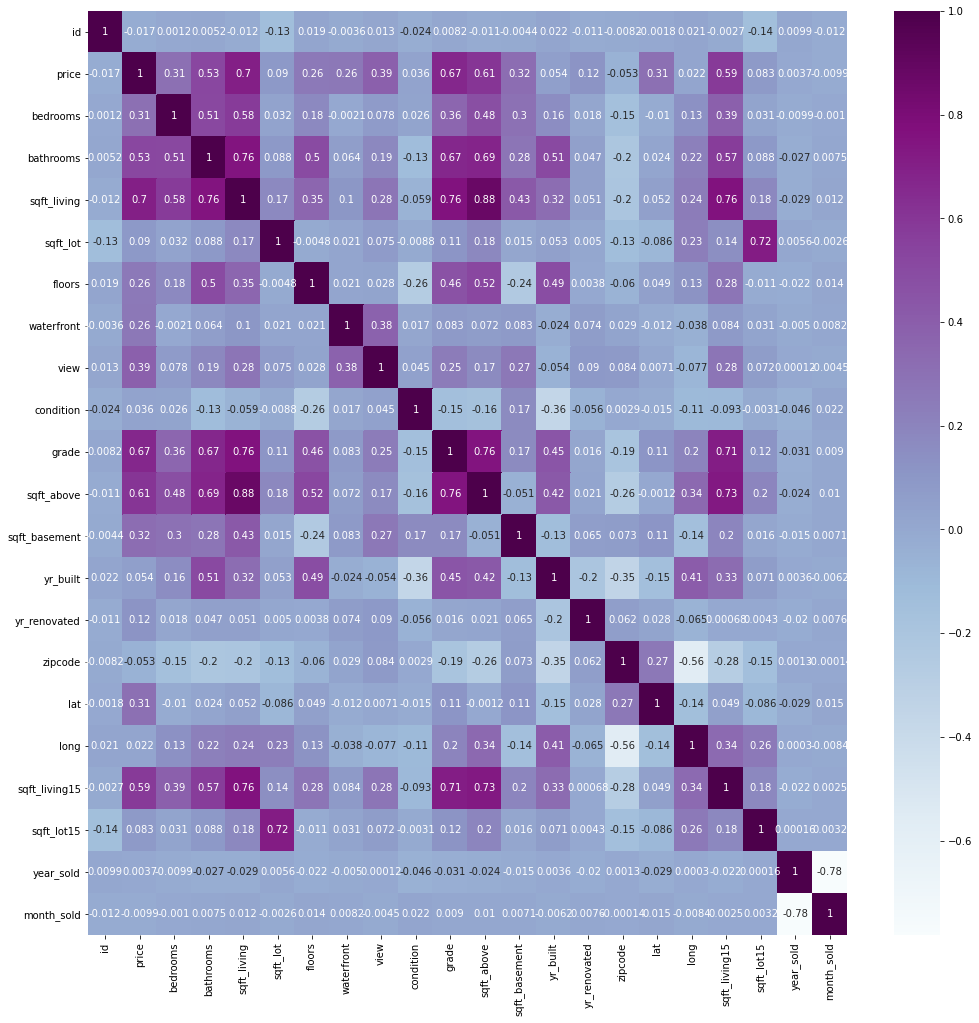

In [5]:
plt.figure(figsize=(17,17))

sns.heatmap(df.corr(), annot=True, cmap="BuPu", annot_kws={"size": 10})

In [126]:
target = 'price'
cont = ['sqft_living',"sqft_loft",'id','bedrooms', 'bathrooms', 'floors', 'view', 'condition','grade', 'zipcode', 'yr_built','yr_renovated', 'sqft_above', 'sqft_basement']
cat= ['bedrooms','bathrooms','view','condition','grade','zipcode','year_sold','month_sold']

## Features Scatter Plots

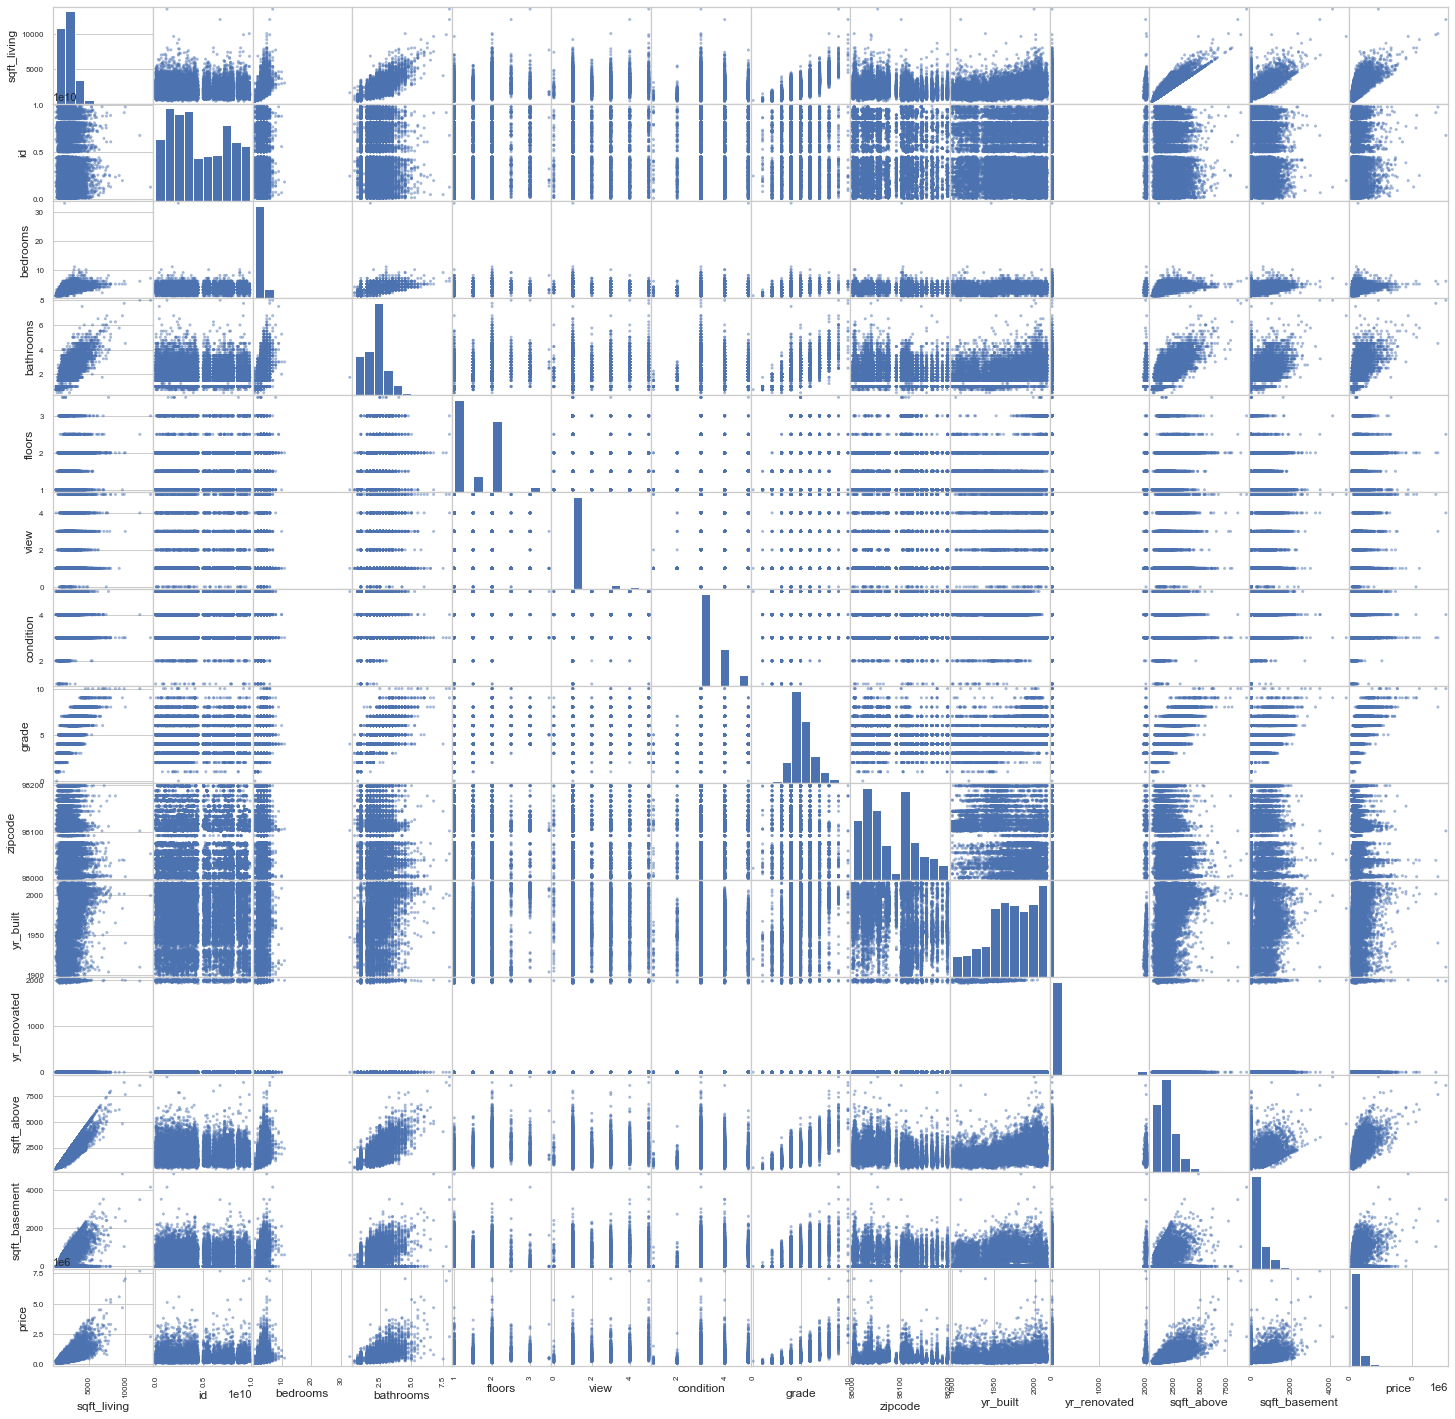

In [125]:
#TESTING FOR MULTICOLLINEARITY 

pd.plotting.scatter_matrix(df[cont+[target]], figsize=(25,25))
plt.show()

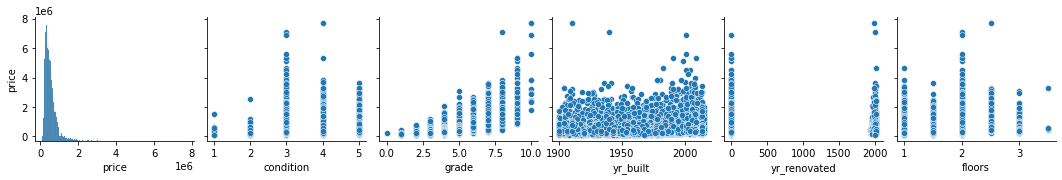

In [47]:
sns.pairplot(df, x_vars= ['price','condition','grade','yr_built','yr_renovated','floors'],y_vars=target)

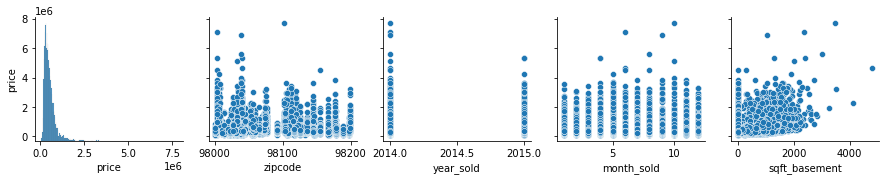

In [45]:
sns.pairplot(df,x_vars=['price','zipcode','year_sold','month_sold',],y_vars=target)

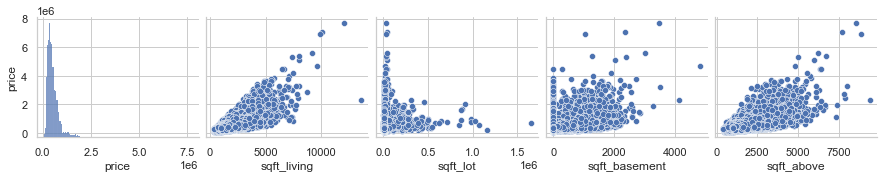

In [128]:
sns.pairplot(df,x_vars=['price','sqft_living','sqft_lot',"sqft_basement",'sqft_above'],y_vars=target)

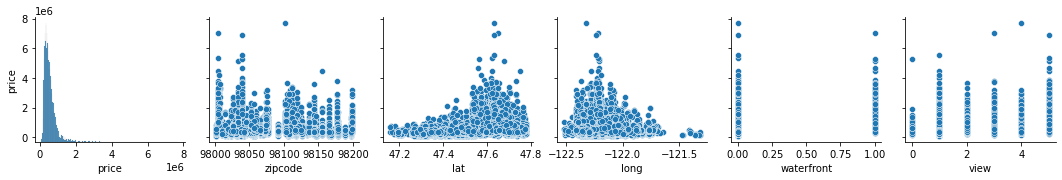

In [48]:
sns.pairplot(df,x_vars=['price','zipcode','lat','long','waterfront','view'],y_vars=target)

## Exploring Catergoricals

### Bedrooms

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


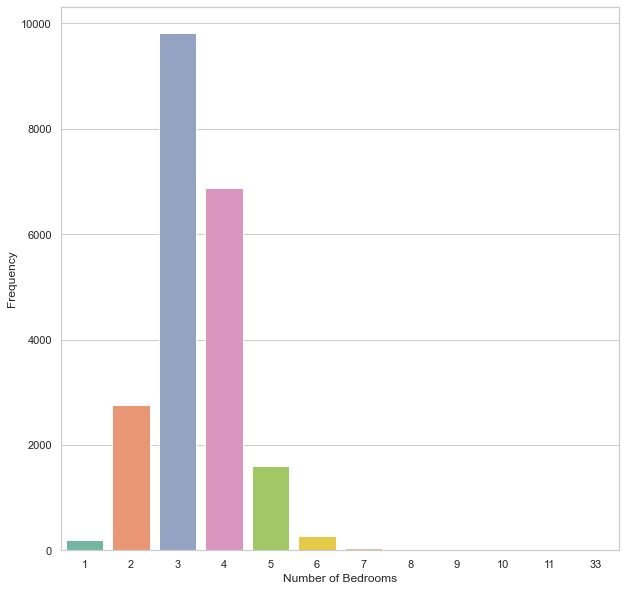

In [74]:
plt.figure(figsize=(10,10))
bedrooms = df['bedrooms'].value_counts()
sns.barplot(bedrooms.index, bedrooms.values,palette =("Set2"))
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

# Removing Outliers


### Grades

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

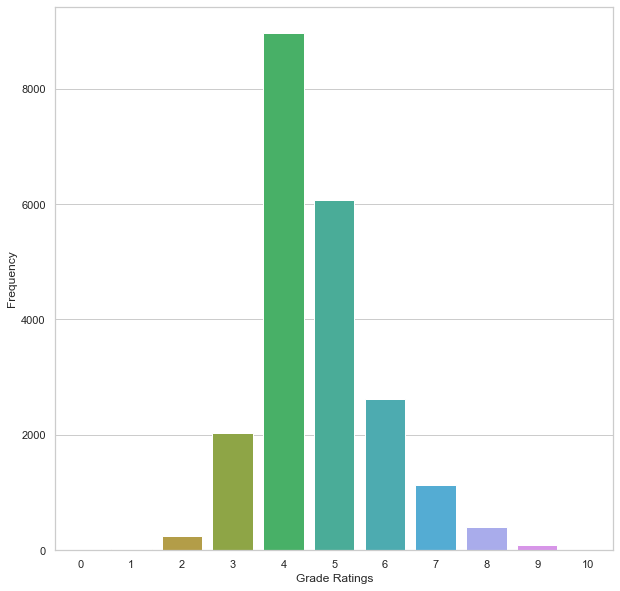

In [76]:
plt.figure(figsize=(10,10))
grades= df['grade'].value_counts()
sns.barplot(grades.index,grades.values)
plt.xlabel('Grade Ratings')
plt.ylabel('Frequency')

### Condition

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

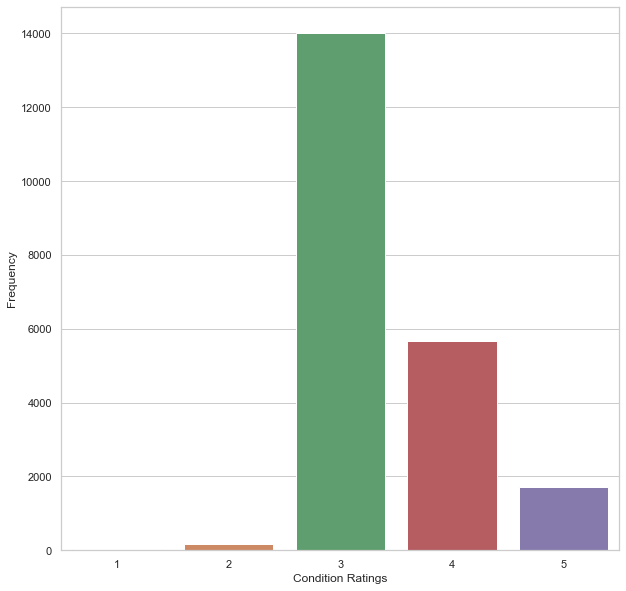

In [78]:
plt.figure(figsize=(10,10))
condition= df['condition'].value_counts()
sns.barplot(condition.index,condition.values)
plt.xlabel('Condition Ratings')
plt.ylabel('Frequency')


### Month Sold

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

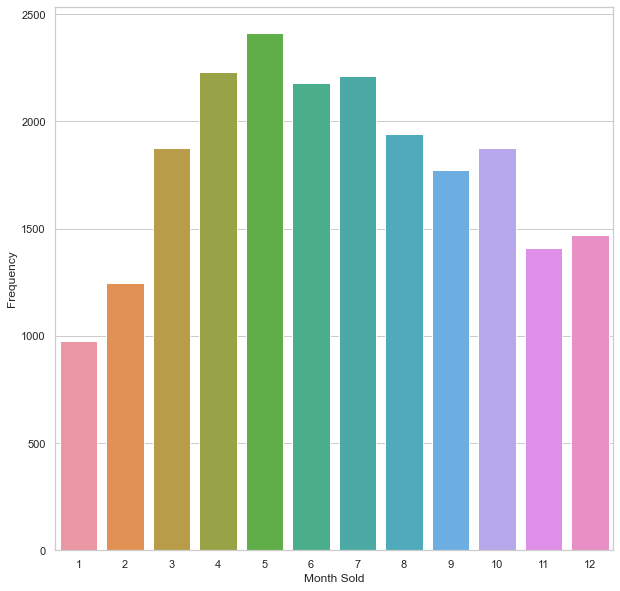

In [88]:
plt.figure(figsize=(10,10))
months= df['month_sold'].value_counts()
sns.barplot(months.index,months.values)
plt.xlabel("Month Sold")
plt.ylabel('Frequency')

### Floors

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

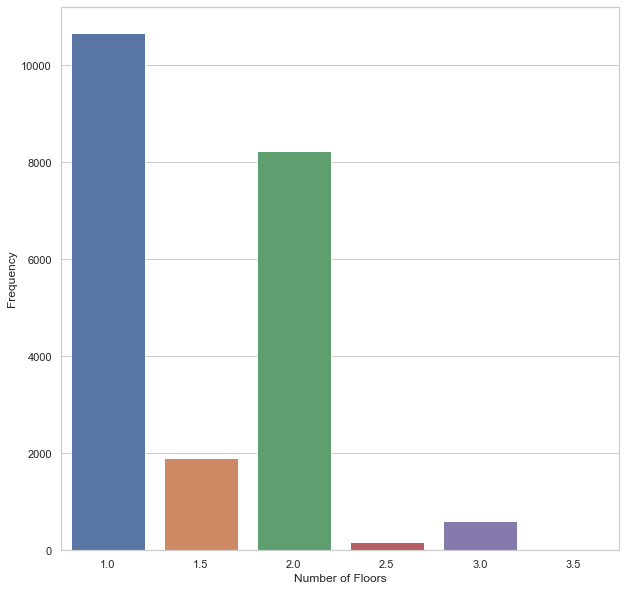

In [92]:
plt.figure(figsize=(10,10))
floors = df['floors'].value_counts()
sns.barplot(floors.index, floors.values)
plt.xlabel('Number of Floors')
plt.ylabel('Frequency')

sns.barplot(df['floors'],df['price'])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'frequency')

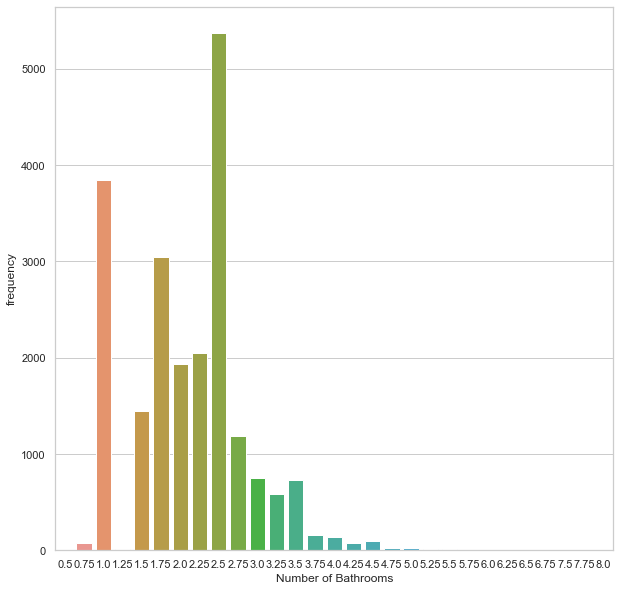

In [94]:
plt.figure(figsize=(10,10))
bathrooms = df['bathrooms'].value_counts()
sns.barplot(bathrooms.index,bathrooms.values)
plt.xlabel('Number of Bathrooms')
plt.ylabel('frequency')

Text(0.5, 1.0, 'Price with Outliers')

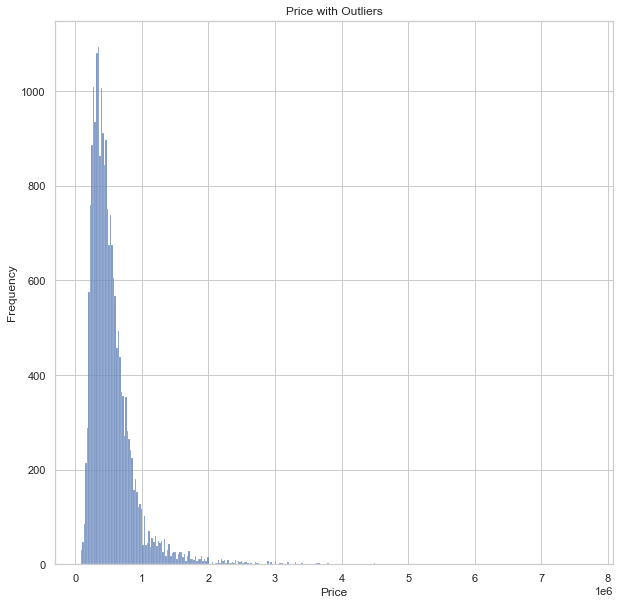

In [111]:
plt.figure(figsize=(10,10))
sns.histplot(df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Price with Outliers")

## TESTING AND REMOVING OUTLIERS

In [113]:
df2 = df.loc[df['price'] <= (df['price'].mean()+df['price'].std()*2.75)]

Text(0.5, 1.0, 'Price without Outliers')

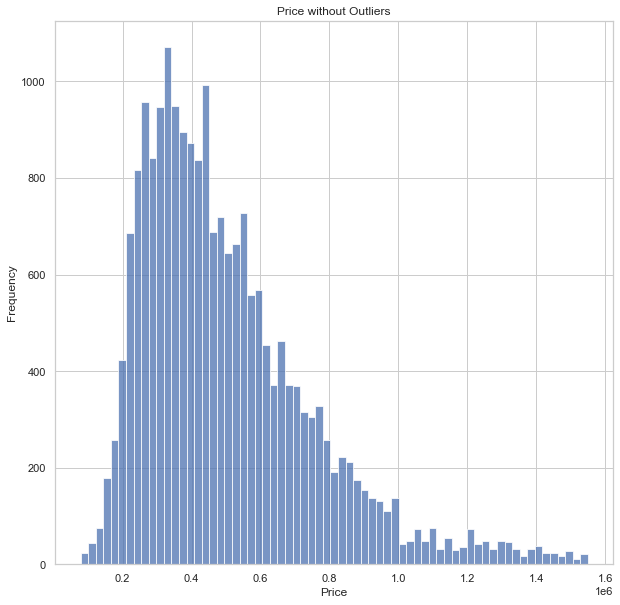

In [116]:
plt.figure(figsize=(10,10))
sns.histplot(df2['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Price without Outliers")

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Num of Bedrooms with Outliers')

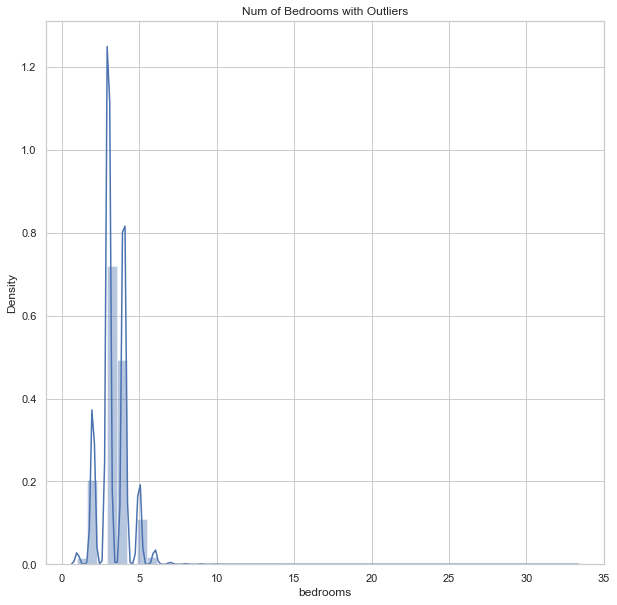

In [133]:
plt.figure(figsize=(10,10))
sns.distplot(df2['bedrooms'])
plt.title('Num of Bedrooms with Outliers')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Num of Bedrooms without Outliers')

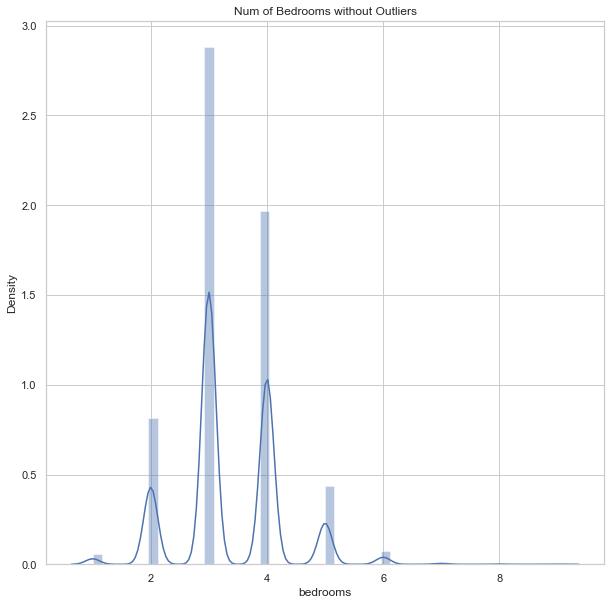

In [140]:
df2 = df2[df2['bedrooms']<10]
plt.figure(figsize=(10,10))
sns.distplot(df2['bedrooms'])
plt.title('Num of Bedrooms without Outliers')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sqft of Lot with Outliers')

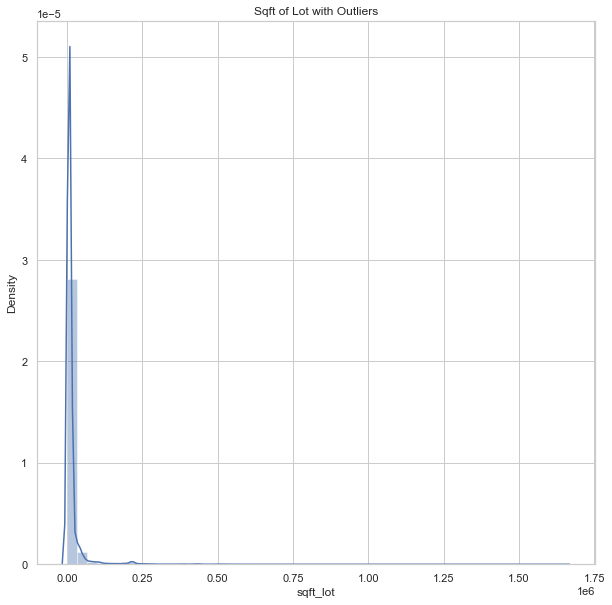

In [144]:
plt.figure(figsize=(10,10))
sns.distplot(df2['sqft_lot'])
plt.title('Sqft of Lot with Outliers')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Sqft of Lot')

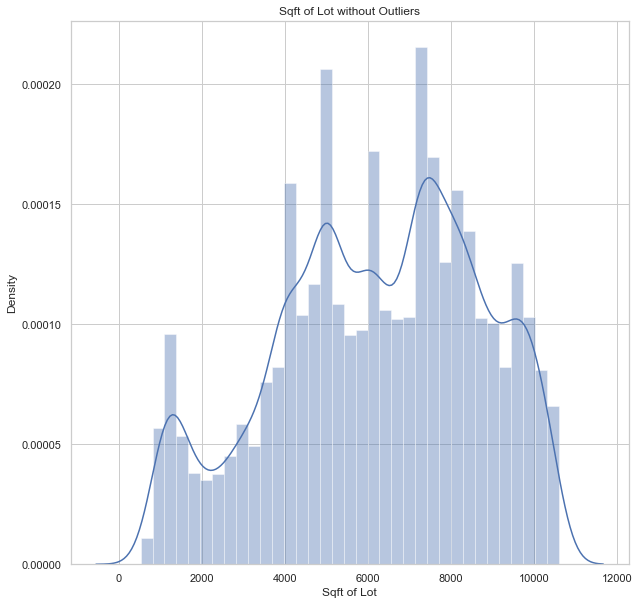

In [150]:
df2 = df2.loc[df['sqft_lot'] <= (df2['sqft_lot'].mean()+df2['sqft_lot'].std()*.5)]
plt.figure(figsize=(10,10))
sns.distplot(df2['sqft_lot'])
plt.title('Sqft of Lot without Outliers')
plt.xlabel('Sqft of Lot')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

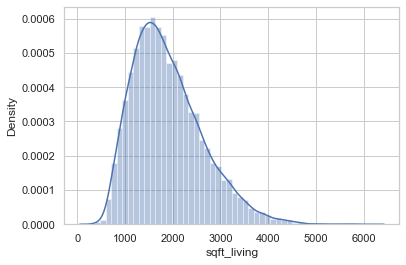

In [152]:
sns.distplot(df2['sqft_living'])# Leaving seems pretty normal to me

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

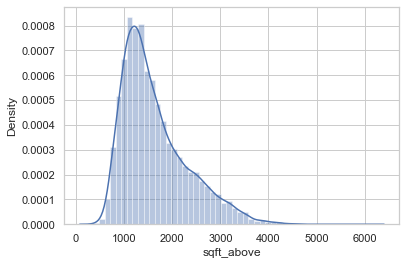

In [153]:
sns.distplot(df2['sqft_above']) #also fine, leaving as is

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

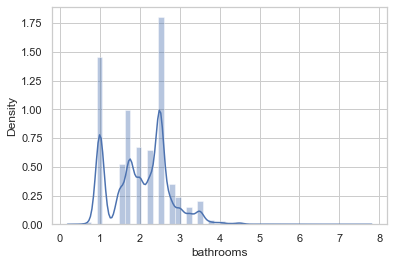

In [154]:
sns.distplot(df2['bathrooms']) # leaving these as removed outliers and looks pretty similar

In [161]:
copy_1 = df2.copy()

# CREATING DUMMIES FOR CATEGORICALS 